# Ask the Expert: How Do I Use Python in SAS Viya?

### Documentation:
- [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/v_020/casfun/titlepage.htm)
- [SAS® Viya® Actions and Action Sets by Name and Product](https://go.documentation.sas.com/doc/en/pgmsascdc/v_018/allprodsactions/titlepage.htm)
- [SAS Scripting Wrapper for Analytics Transfer (SWAT) Documentation](https://sassoftware.github.io/python-swat/index.html)
- [python-swat github](https://github.com/sassoftware/python-swat)


In [3]:
################################
## Data packages              ##
################################
## The SWAT package is required to connect to the CAS server
import swat
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
plt.style.use('seaborn')

## my personal module to connect to CAS
from casConnect import connect_to_cas 

## Options
pd.set_option('display.max_columns', 50)

################################
## Set notebook options       ##
################################

## Expand settings to view all columns
pd.set_option("display.max_columns", None)

## Options to view the CAS API
swat.options.cas.trace_actions = False      # Enabling tracing of actions (Default is False. Will change to true later)
swat.options.cas.trace_ui_actions = False   # Display the actions behind “UI” methods (Default is False. Will change to true later)    

## 1. Connect to the CAS Server in SAS Viya

##### To connect to the CAS server you will need:
1. the host name, 
2. the port number, 
3. authentication

Visit the documentation [Getting Started with SAS® Viya® for Python](https://documentation.sas.com/doc/en/pgmsascdc/v_006/caspg3/titlepage.htm?homeOnFail) for more information about connecting to CAS.

**Be aware that connecting to the CAS server can be implemented in various ways, so you might need to see your system administrator about how to make a connection. Please follow company policy regarding authentication.**

In [4]:
## My personal connection to CAS. You will have your own.
## General form: swat.CAS(host, port, username, password)
conn = connect_to_cas() 

## Viya for Learners CAS connection information
# hostValue = os.environ.get('CASHOST')
# portValue = os.environ.get('CASPORT')
# passwordToken=os.environ.get('SAS_VIYA_TOKEN')
# conn = swat.CAS(hostname=hostValue,port=portValue,password=passwordToken)

In [5]:
type(conn)

swat.cas.connection.CAS

## 2. Explore the Available Data on the CAS Server 

a. View available caslibs on the CAS server.

In [ ]:
conn.caslibInfo()

b. View available in-memory tables.

In [11]:
conn.tableInfo(caslib = 'casuser')

NOTE: No tables are available in caslib CASUSER(Peter.Styliadis@sas.com) of Cloud Analytic Services.


+ Elapsed: 0.0137s, user: 0.0049s, sys: 0.0191s, mem: 1.46mb

c. View available data source files.

In [12]:
conn.fileInfo(caslib = 'casuser')

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,cars.sas7bdat,139264,,2022-08-16T21:25:39+00:00,1.976304e+09
1,-rwxr-xr-x,sas,sas,VTI.sashdat,413080,NONE,2022-10-11T13:40:38+00:00,1.981115e+09
2,-rwxr-xr-x,sas,sas,hmeq.sashdat,630384,NONE,2022-10-13T17:56:59+00:00,1.981303e+09
3,-rwxr-xr-x,sas,sas,tsa_claims_raw.csv,34936205,,2023-01-16T13:13:53+00:00,1.989494e+09
4,-rwxr-xr-x,sas,sas,warranty_claims.parquet,4096,NONE,2022-11-17T13:43:26+00:00,1.984312e+09
5,-rwxr-xr-x,sas,sas,HMEQ_SAS.parquet,4096,NONE,2022-11-17T13:46:56+00:00,1.984312e+09
6,-rwxr-xr-x,sas,sas,cars.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
7,-rwxr-xr-x,sas,sas,WARRANTY_CLAIMS.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
8,-rwxr-xr-x,sas,sas,classCopy.sashdat,20904,NONE,2022-12-21T16:59:03+00:00,1.987261e+09
9,-rwxr-xr-x,sas,sas,cars.sashdat,102936,NONE,2023-01-06T14:29:25+00:00,1.988635e+09


## 3. Load Data into Memory
**NOTE:** Think of this as loading a CSV file as a DataFrame on your client machine. But here you are are loading a CSV file from a caslib's data source into memory on the CAS server.

a. View documentation for the loadTable action.

In [ ]:
conn.loadTable?

b. Load the **ordersDemo.csv** file into memory on the CAS server. It's like loading a CSV file as a DataFrame using Pandas.

**NOTE:** Path is the only required parameter.

In [13]:
conn.loadTable(path = 'ordersDemo.csv', caslib =  'casuser',
               casOut = {'name' : 'orders', 
                         'caslib' : 'casuser', 
                         'replace' : True})

NOTE: Cloud Analytic Services made the file ordersDemo.csv available as table ORDERS in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'ORDERS'

[casTable]

 CASTable('ORDERS', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 0.0827s, user: 0.0873s, sys: 0.158s, mem: 395mb

c. Check available in-memory tables. Notice orders is not a global table.

In [14]:
conn.tableInfo(caslib = 'casuser')

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,ORDERS,19200,9,0,utf-8,2023-01-18T00:38:37+00:00,2023-01-18T00:38:37+00:00,2023-01-18T00:38:37+00:00,UTF8,1.989622e+09,1.989622e+09,1.989622e+09,0,0,0,0,ordersDemo.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-18T00:35:57+00:00,1.989621e+09


## 4. Reference the CAS Table

a. Use the CASTable method to reference the CAS table in a variable.

In [15]:
orders = conn.CASTable('orders', caslib = 'casuser')

b. View the object type. Notice it's a CASTable object.

In [16]:
type(orders)

swat.cas.table.CASTable

c. View the object. Notice it's simply a reference to a CAS table.

In [17]:
orders

CASTable('orders', caslib='casuser')

**NOTE:** All actions or methods executed on a **CASTable** object, **CASColumn** object, or **CASTableGroupBy** object are processed in the CAS server. Summarized results are then returned to the client.

## 5. Preview the CAS Table

a. Use the head method on the CASTable object. The head method processes the data on the CAS server and returns a SASDataFrame to the client.

In [18]:
orders.head()

,Product,Country,OrderDate,DiscountCode,Return,StoreID,Quantity,Price,Cost
0,Pants,EN,22093.0,FREEDEAL,,19.0,330.0,7.64,1.49
1,Shirts,US,22177.0,,,31.0,440.0,6.39,1.99
2,Shirts,CA,21884.0,,,20.0,265.0,7.19,1.99
3,Sweatshirt,EN,22563.0,,,12.0,210.0,9.89,1.99
4,Pants,CA,22601.0,TC10,,27.0,260.0,8.09,1.49


b. Check the object returned from the head method.

In [19]:
df = orders.head()
type(df)

swat.dataframe.SASDataFrame

c. A SASDataFrame lives on the client. You can work with the SASDataFrame as you would a Pandas DataFrame. Here a simple Pandas plot is executed.

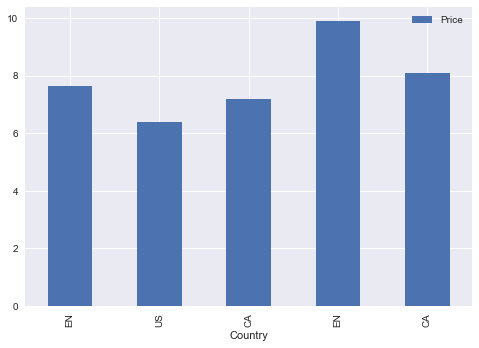

In [20]:
df.plot(kind='bar', x = 'Country', y = 'Price');

d. Execute the fetch action. The fetch action processes the data on the CAS server and returns a CASResults object to the client.

In [21]:
orders.fetch(to=5)

,Product,Country,OrderDate,DiscountCode,Return,StoreID,Quantity,Price,Cost
0,Pants,EN,22093.0,FREEDEAL,,19.0,330.0,7.64,1.49
1,Shirts,US,22177.0,,,31.0,440.0,6.39,1.99
2,Shirts,CA,21884.0,,,20.0,265.0,7.19,1.99
3,Sweatshirt,EN,22563.0,,,12.0,210.0,9.89,1.99
4,Pants,CA,22601.0,TC10,,27.0,260.0,8.09,1.49


e. Check the object returned from the fetch action.

In [22]:
cr = orders.fetch(to=5)
type(cr)

swat.cas.results.CASResults

f. Work with the CASResults object by viewing the available keys.

In [23]:
cr.keys()

odict_keys(['Fetch'])

g. Call the fetch key to return the DataFrame.

In [24]:
cr['Fetch']

,Product,Country,OrderDate,DiscountCode,Return,StoreID,Quantity,Price,Cost
0,Pants,EN,22093.0,FREEDEAL,,19.0,330.0,7.64,1.49
1,Shirts,US,22177.0,,,31.0,440.0,6.39,1.99
2,Shirts,CA,21884.0,,,20.0,265.0,7.19,1.99
3,Sweatshirt,EN,22563.0,,,12.0,210.0,9.89,1.99
4,Pants,CA,22601.0,TC10,,27.0,260.0,8.09,1.49


In [25]:
df = cr['Fetch']
type(df)

swat.dataframe.SASDataFrame

h. Turn on the CAS API to see what is executed on the CAS server.

In [26]:
swat.options.cas.trace_actions = True      
swat.options.cas.trace_ui_actions = True

i. Execute the head method. Notice the head method is converted to the fetch action through the CAS API.

In [27]:
orders.head()

[table.fetch]
    _apptag = 'UI'
    _messagelevel = 'error'
    from = 1
    index = True
    sastypes = False
    table.caslib = 'casuser'
    table.name = 'orders'
    to = 5



,Product,Country,OrderDate,DiscountCode,Return,StoreID,Quantity,Price,Cost
0,Pants,EN,22093.0,FREEDEAL,,19.0,330.0,7.64,1.49
1,Shirts,US,22177.0,,,31.0,440.0,6.39,1.99
2,Shirts,CA,21884.0,,,20.0,265.0,7.19,1.99
3,Sweatshirt,EN,22563.0,,,12.0,210.0,9.89,1.99
4,Pants,CA,22601.0,TC10,,27.0,260.0,8.09,1.49


j. Execute the fetch action. Notice the fetch action is sent to the CAS server through the CAS API.

In [28]:
orders.fetch(to=5)

[table.fetch]
    sastypes = False
    table.caslib = 'casuser'
    table.name = 'orders'
    to = 5



,Product,Country,OrderDate,DiscountCode,Return,StoreID,Quantity,Price,Cost
0,Pants,EN,22093.0,FREEDEAL,,19.0,330.0,7.64,1.49
1,Shirts,US,22177.0,,,31.0,440.0,6.39,1.99
2,Shirts,CA,21884.0,,,20.0,265.0,7.19,1.99
3,Sweatshirt,EN,22563.0,,,12.0,210.0,9.89,1.99
4,Pants,CA,22601.0,TC10,,27.0,260.0,8.09,1.49


k. Turn of the CAS API options.

In [29]:
swat.options.cas.trace_actions = False
swat.options.cas.trace_ui_actions = False

## 5. Explore the CAS Table

a. View the number of rows and columns in a CAS table.

In [30]:
orders.shape

(19200, 9)

b. Execute the numRows action to view the number of rows of a CASTable.

In [31]:
orders.numRows()

[numrows]

 19200

+ Elapsed: 0.0149s, user: 0.0143s, sys: 0.0145s, mem: 1.98mb

c. Execute the numRows action and access the integer by calling the numrows key.

In [32]:
orders.numRows()['numrows']

19200

d. Check the data types of columns in a CAS table. The columnInfo action is recommended since CAS table have additional column attributes that dtypes does not return.

In [33]:
orders.dtypes

Product         varchar
Country         varchar
OrderDate        double
DiscountCode    varchar
Return          varchar
StoreID          double
Quantity         double
Price            double
Cost             double
dtype: object

e. The columnInfo action shows all CAS table column attributes.

In [34]:
orders.columnInfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,Product,,1,varchar,10,10,,0,0
1,Country,,2,varchar,2,2,,0,0
2,OrderDate,,3,double,8,12,,0,0
3,DiscountCode,,4,varchar,10,10,,0,0
4,Return,,5,varchar,3,3,,0,0
5,StoreID,,6,double,8,12,,0,0
6,Quantity,,7,double,8,12,,0,0
7,Price,,8,double,8,12,,0,0
8,Cost,,9,double,8,12,,0,0


f. View missing rows in columns using the nmiss method. Processing occurs in CAS and returns a Series to the client.

In [35]:
miss_df = orders.nmiss()
miss_df

Product             0
Country             0
OrderDate           0
DiscountCode    15417
Return          18266
StoreID             0
Quantity            0
Price               0
Cost                0
dtype: int64

g. Plot the series using Pandas.

<AxesSubplot:>

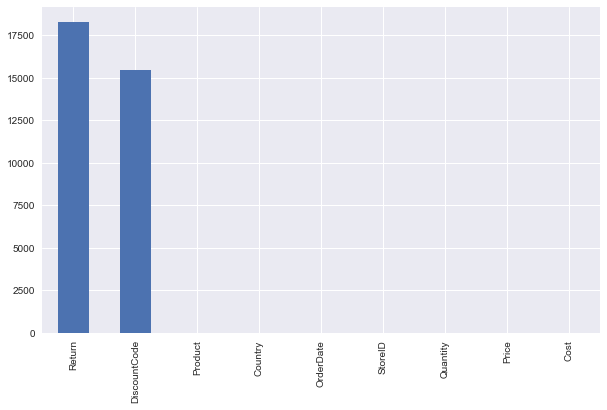

In [37]:
(miss_df                    
 .sort_values(ascending = False)
 .plot(kind = 'bar', figsize = (10,6))
)

h. View the number of distinct and missing values in a CAS table. Processing occurs in CAS and returns a CASResults object to the client.

In [38]:
cr = orders.distinct()
cr

,Column,NDistinct,NMiss,Trunc
0,Product,4.0,0.0,0.0
1,Country,5.0,0.0,0.0
2,OrderDate,1818.0,0.0,0.0
3,DiscountCode,8.0,15417.0,0.0
4,Return,2.0,18266.0,0.0
5,StoreID,50.0,0.0,0.0
6,Quantity,97.0,0.0,0.0
7,Price,19.0,0.0,0.0
8,Cost,3.0,0.0,0.0


i. Store the SASDataFrame in a variable from the CASResults object. This is all executed on the client since you are working with a CASResults object.

In [39]:
distinct_df = cr['Distinct']
distinct_df

,Column,NDistinct,NMiss,Trunc
0,Product,4.0,0.0,0.0
1,Country,5.0,0.0,0.0
2,OrderDate,1818.0,0.0,0.0
3,DiscountCode,8.0,15417.0,0.0
4,Return,2.0,18266.0,0.0
5,StoreID,50.0,0.0,0.0
6,Quantity,97.0,0.0,0.0
7,Price,19.0,0.0,0.0
8,Cost,3.0,0.0,0.0


j. Work with the SASDataFrame as you would a Pandas DataFrame

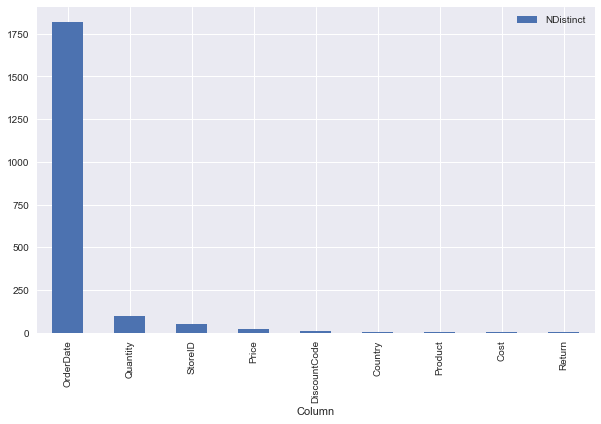

In [43]:
(distinct_df
 .sort_values('NDistinct', ascending=False)
 .plot(kind = 'bar', x = 'Column', y = 'NDistinct', figsize = (10,6))
);

## 6. Filtering Rows, Selecting Columns, Creating Caclulated Columns Using the CASTable Object

a. View the CASTable object. The object is simply a reference to a table on the CAS server. 

In [44]:
orders

CASTable('orders', caslib='casuser')

In [45]:
orders.head()

,Product,Country,OrderDate,DiscountCode,Return,StoreID,Quantity,Price,Cost
0,Pants,EN,22093.0,FREEDEAL,,19.0,330.0,7.64,1.49
1,Shirts,US,22177.0,,,31.0,440.0,6.39,1.99
2,Shirts,CA,21884.0,,,20.0,265.0,7.19,1.99
3,Sweatshirt,EN,22563.0,,,12.0,210.0,9.89,1.99
4,Pants,CA,22601.0,TC10,,27.0,260.0,8.09,1.49


b. Add a filter to the CASTable object for all rows where Country = US using the where parameter. View the CASTable object. Notice a where parameter was added to the CASTable object.

In [46]:
orders.where = 'Country = "US"'
orders

## Alternate
#orders.query('Country = "US"', inplace = True)

CASTable('orders', caslib='casuser', where='Country = "US"')

c. Execute the head method on the CASTable object. Notice only rows where Country is US are processed and returned. The original table is left unchanged.

In [47]:
orders.head(20)

,Product,Country,OrderDate,DiscountCode,Return,StoreID,Quantity,Price,Cost
0,Shirts,US,22177.0,,,31.0,440.0,6.39,1.99
1,Pants,US,21741.0,FMDISCOUNT,,33.0,155.0,8.54,1.49
2,Shirts,US,20958.0,TC10,,11.0,145.0,7.59,1.99
3,Shirts,US,21977.0,,,25.0,230.0,7.19,1.99
4,Sweatshirt,US,21353.0,,,22.0,495.0,8.79,1.99
5,Pants,US,22275.0,EMP50,,18.0,135.0,8.54,1.49
6,Pants,US,21361.0,,,26.0,175.0,8.54,1.49
7,Shirts,US,21534.0,TENOFF,,15.0,175.0,7.59,1.99
8,Hats,US,22186.0,BB20,,16.0,495.0,3.99,0.99
9,Hats,US,22391.0,TC10,,20.0,290.0,4.49,0.99


d. Use the value_counts method with the CASTable object. Noticed the where parameter again specifies CAS to only process specific rows. The original CAS table still exists with all countries.

In [48]:
display(orders)

orders.Country.value_counts()

CASTable('orders', caslib='casuser', where='Country = "US"')

US    7588
dtype: int64

e. Add the vars parameter to add columns to the CASTable object.

In [49]:
orders.vars = ['Country', 'Product', 'OrderDate', 'Quantity', 'Price', 'Cost']
orders

CASTable('orders', caslib='casuser', vars=['Country', 'Product', 'OrderDate', 'Quantity', 'Price', 'Cost'], where='Country = "US"')

f. Execute the head method. Notice only rows where Country is US and the specified columns were processed.

In [50]:
orders.head(10)

,Country,Product,OrderDate,Quantity,Price,Cost
0,US,Shirts,22177.0,440.0,6.39,1.99
1,US,Pants,21741.0,155.0,8.54,1.49
2,US,Shirts,20958.0,145.0,7.59,1.99
3,US,Shirts,21977.0,230.0,7.19,1.99
4,US,Sweatshirt,21353.0,495.0,8.79,1.99
5,US,Pants,22275.0,135.0,8.54,1.49
6,US,Pants,21361.0,175.0,8.54,1.49
7,US,Shirts,21534.0,175.0,7.59,1.99
8,US,Hats,22186.0,495.0,3.99,0.99
9,US,Hats,22391.0,290.0,4.49,0.99


g. Create a calculated column named TotalPrice. Append the new column to the vars list.

In [51]:
orders.computedVarsProgram = 'TotalPrice = Quantity * Price'

## Alternate
#orders.eval('TotalPrice = Quantity * Price')

orders.vars.append('TotalPrice')
orders

CASTable('orders', caslib='casuser', computedvarsprogram='TotalPrice = Quantity * Price', vars=['Country', 'Product', 'OrderDate', 'Quantity', 'Price', 'Cost', 'TotalPrice'], where='Country = "US"')

h. Execute the head method on the CASTable object. Notice only US rows, only the columns specified, including the calculated column.

In [52]:
orders.head(10)

,Country,Product,OrderDate,Quantity,Price,Cost,TotalPrice
0,US,Shirts,22177.0,440.0,6.39,1.99,2811.60
1,US,Pants,21741.0,155.0,8.54,1.49,1323.70
2,US,Shirts,20958.0,145.0,7.59,1.99,1100.55
3,US,Shirts,21977.0,230.0,7.19,1.99,1653.70
4,US,Sweatshirt,21353.0,495.0,8.79,1.99,4351.05
5,US,Pants,22275.0,135.0,8.54,1.49,1152.90
6,US,Pants,21361.0,175.0,8.54,1.49,1494.50
7,US,Shirts,21534.0,175.0,7.59,1.99,1328.25
8,US,Hats,22186.0,495.0,3.99,0.99,1975.05
9,US,Hats,22391.0,290.0,4.49,0.99,1302.10


i. Execute the fetch action on the CASTable object. Notice you can use the same CASTable object with the associated parameters in other methods and actions.

In [53]:
orders.fetch(to = 10)

,Country,Product,OrderDate,Quantity,Price,Cost,TotalPrice
0,US,Shirts,22177.0,440.0,6.39,1.99,2811.60
1,US,Pants,21741.0,155.0,8.54,1.49,1323.70
2,US,Shirts,20958.0,145.0,7.59,1.99,1100.55
3,US,Shirts,21977.0,230.0,7.19,1.99,1653.70
4,US,Sweatshirt,21353.0,495.0,8.79,1.99,4351.05
5,US,Pants,22275.0,135.0,8.54,1.49,1152.90
6,US,Pants,21361.0,175.0,8.54,1.49,1494.50
7,US,Shirts,21534.0,175.0,7.59,1.99,1328.25
8,US,Hats,22186.0,495.0,3.99,0.99,1975.05
9,US,Hats,22391.0,290.0,4.49,0.99,1302.10


j. View summary statistics using the describe method. Again, all parameters on the CASTable object are executed.

In [54]:
display(orders)

orders.describe()

CASTable('orders', caslib='casuser', computedvarsprogram='TotalPrice = Quantity * Price', vars=['Country', 'Product', 'OrderDate', 'Quantity', 'Price', 'Cost', 'TotalPrice'], where='Country = "US"')

,OrderDate,Quantity,Price,Cost,TotalPrice
count,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000
mean,21921.525567,260.68661,7.720759,1.747775,1933.301937
std,500.810401,138.34579,1.565660,0.331706,1005.825466
min,20820.000000,20.00000,3.990000,0.990000,99.800000
25%,21550.000000,140.00000,6.790000,1.490000,1100.550000
50%,21970.000000,260.00000,7.640000,1.990000,1905.350000
75%,22374.500000,380.00000,8.790000,1.990000,2716.000000
max,22644.000000,500.00000,10.990000,1.990000,4395.000000


Delete the parameters and go back to the original CAS table reference.

In [55]:
orders.del_params('computedvarsprogram', 'where', 'vars')

display(orders)

orders.head(10)


## Delete parameters individually
#del orders.vars
#del orders.computedvarsprogram
#del orders.where

CASTable('orders', caslib='casuser')

,Product,Country,OrderDate,DiscountCode,Return,StoreID,Quantity,Price,Cost
0,Pants,EN,22093.0,FREEDEAL,,19.0,330.0,7.64,1.49
1,Shirts,US,22177.0,,,31.0,440.0,6.39,1.99
2,Shirts,CA,21884.0,,,20.0,265.0,7.19,1.99
3,Sweatshirt,EN,22563.0,,,12.0,210.0,9.89,1.99
4,Pants,CA,22601.0,TC10,,27.0,260.0,8.09,1.49
5,Pants,US,21741.0,FMDISCOUNT,,33.0,155.0,8.54,1.49
6,Shirts,US,20958.0,TC10,,11.0,145.0,7.59,1.99
7,Shirts,US,21977.0,,,25.0,230.0,7.19,1.99
8,Sweatshirt,US,21353.0,,,22.0,495.0,8.79,1.99
9,Pants,AU,22495.0,,,27.0,100.0,8.99,1.49


## 7. Adding Formats to a CAS Table

a. Use the alterTable action to add formats to a CAS table. Notice the OrderDate column now looks like a date instead of a SAS date value (number).

In [56]:
orders.alterTable(columns = [{'name':'OrderDate', 'format':'mmddyy10.'},
                             {'name':'Price', 'format':'dollar16.2'},
                             {'name':'Cost', 'format':'dollar16.2'}])
orders.head()

,Product,Country,OrderDate,DiscountCode,Return,StoreID,Quantity,Price,Cost
0,Pants,EN,2020-06-27,FREEDEAL,,19.0,330.0,7.64,1.49
1,Shirts,US,2020-09-19,,,31.0,440.0,6.39,1.99
2,Shirts,CA,2019-12-01,,,20.0,265.0,7.19,1.99
3,Sweatshirt,EN,2021-10-10,,,12.0,210.0,9.89,1.99
4,Pants,CA,2021-11-17,TC10,,27.0,260.0,8.09,1.49


b. Look at the column attributes. Notice a format is applied to the OrderDate, Price and Cost columns. However, there was no change to the Price and Cost columns. While the CAS table has the formats, when returned to client as a DataFrame, SAS formats are typically not shown since DataFrames do not have the concept of SAS formats. If the table was used in another SAS Viya application, the formats would be shown.

[Formats by Category](https://go.documentation.sas.com/doc/en/pgmsascdc/v_020/leforinforref/n0p2fmevfgj470n17h4k9f27qjag.htm?homeOnFail)

In [57]:
orders.columnInfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,Product,,1,varchar,10,10,,0,0
1,Country,,2,varchar,2,2,,0,0
2,OrderDate,,3,double,8,12,MMDDYY,10,0
3,DiscountCode,,4,varchar,10,10,,0,0
4,Return,,5,varchar,3,3,,0,0
5,StoreID,,6,double,8,12,,0,0
6,Quantity,,7,double,8,12,,0,0
7,Price,,8,double,8,16,DOLLAR,16,2
8,Cost,,9,double,8,16,DOLLAR,16,2


## 8. Analyzing Continuous Columns

a. View the CASTable object.

In [58]:
orders

CASTable('orders', caslib='casuser')

b. Execute the describe method on the CAS table. View the time it took to execute the cell.

In [59]:
%%time
orders.describe()

Wall time: 1.12 s


,OrderDate,StoreID,Quantity,Price,Cost
count,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000
mean,21920.206354,19.471719,259.926302,7.712195,1.745469
std,502.020645,6.347912,138.471096,1.568101,0.332332
min,20820.000000,3.000000,20.000000,3.990000,0.990000
25%,21553.500000,15.000000,140.000000,6.790000,1.490000
50%,21972.000000,19.000000,260.000000,7.640000,1.990000
75%,22372.000000,23.000000,380.000000,8.790000,1.990000
max,22644.000000,55.000000,500.000000,10.990000,1.990000


c. Execute the summary action for similar results. Notice the time it took to execute the action. Typically, actions wil be faster than the swat Pandas methods. This is because the methods are converted actions behind the scenes to mimic Pandas output.

In [60]:
orders.summary()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT,Skewness,Kurtosis
0,OrderDate,20820.00,22644.00,19200.0,0.0,21920.206354,4.208680e+08,502.020645,3.623022,252024.728185,9.230351e+12,4.838623e+09,2.290219,6050.254942,0.0,-0.392944,-0.950400
1,StoreID,3.00,55.00,19200.0,0.0,19.471719,3.738570e+05,6.347912,0.045812,40.295986,8.053281e+06,7.736426e+05,32.600676,425.034327,0.0,0.628289,0.542602
2,Quantity,20.00,500.00,19200.0,0.0,259.926302,4.990585e+06,138.471096,0.999329,19174.244529,1.665311e+09,3.681263e+08,53.273214,260.100814,0.0,0.007628,-1.200699
3,Price,3.99,10.99,19200.0,0.0,7.712195,1.480741e+05,1.568101,0.011317,2.458941,1.189186e+06,4.720920e+04,20.332745,681.482330,0.0,-0.206189,0.215245
4,Cost,0.99,1.99,19200.0,0.0,1.745469,3.351300e+04,0.332332,0.002398,0.110445,6.061632e+04,2.120426e+03,19.039702,727.763815,0.0,-1.020390,-0.155849


d. Specify the summary statistics in the summary action.

In [61]:
orders.summary(subSet = ['MEAN', 'MAX', 'MIN'])

,Column,Min,Max,Mean
0,OrderDate,20820.00,22644.00,21920.206354
1,StoreID,3.00,55.00,19.471719
2,Quantity,20.00,500.00,259.926302
3,Price,3.99,10.99,7.712195
4,Cost,0.99,1.99,1.745469


e. Create a calculated column, then execute an action. Use the inputs parameter to specify the columns to analyze.

In [62]:
orders.computedVarsProgram = 'TotalPrice = Quantity * Price'
display(orders)

orders.summary(inputs = ['TotalPrice', 'Price'],
               subSet = ['MEAN', 'MAX', 'MIN'])

CASTable('orders', caslib='casuser', computedvarsprogram='TotalPrice = Quantity * Price')

,Column,Min,Max,Mean
0,TotalPrice,99.80,4395.00,1922.878914
1,Price,3.99,10.99,7.712195


## 9. Analyzing Categorical Columns

a. View the CASTable object.

In [63]:
orders

CASTable('orders', caslib='casuser', computedvarsprogram='TotalPrice = Quantity * Price')

b. Remove the computedVarsProgram parameter to specify the original CAS table.

In [64]:
del orders.computedvarsprogram
orders

CASTable('orders', caslib='casuser')

c. Use the value_counts method view counts of unique values.

In [65]:
orders.Country.value_counts()

US    7588
GR    3893
CA    3776
AU    1974
EN    1969
dtype: int64

In [66]:
orders.Product.value_counts()

Shirts        7812
Pants         5706
Sweatshirt    3840
Hats          1842
dtype: int64

d. You can also use the freq action with multiple columns. It will return the results in a single DataFrame within the CASResults object.

In [67]:
cr = orders.freq(inputs = ['Country', 'Product'])
cr

,Column,CharVar,FmtVar,Level,Frequency
0,Country,AU,AU,1,1974.0
1,Country,CA,CA,2,3776.0
2,Country,EN,EN,3,1969.0
3,Country,GR,GR,4,3893.0
4,Country,US,US,5,7588.0
5,Product,Hats,Hats,1,1842.0
6,Product,Pants,Pants,2,5706.0
7,Product,Shirts,Shirts,3,7812.0
8,Product,Sweatshirt,Sweatshirt,4,3840.0


e. Store the DataFrame in the variable df by calling the Frequency key.

In [68]:
df = cr['Frequency']
df

,Column,CharVar,FmtVar,Level,Frequency
0,Country,AU,AU,1,1974.0
1,Country,CA,CA,2,3776.0
2,Country,EN,EN,3,1969.0
3,Country,GR,GR,4,3893.0
4,Country,US,US,5,7588.0
5,Product,Hats,Hats,1,1842.0
6,Product,Pants,Pants,2,5706.0
7,Product,Shirts,Shirts,3,7812.0
8,Product,Sweatshirt,Sweatshirt,4,3840.0


### All code below is just Pandas. All processing occurs on the client since you are working with a SASDataFrame. 
f. The big data data processing was already completed on the CAS server and the summary was returned to the client as a SASDataFrame in the previous cells.

,Column,CharVar,FmtVar,Level,Frequency
4,Country,US,US,5,7588.0
3,Country,GR,GR,4,3893.0
1,Country,CA,CA,2,3776.0
0,Country,AU,AU,1,1974.0
2,Country,EN,EN,3,1969.0


,Column,CharVar,FmtVar,Level,Frequency
7,Product,Shirts,Shirts,3,7812.0
6,Product,Pants,Pants,2,5706.0
8,Product,Sweatshirt,Sweatshirt,4,3840.0
5,Product,Hats,Hats,1,1842.0


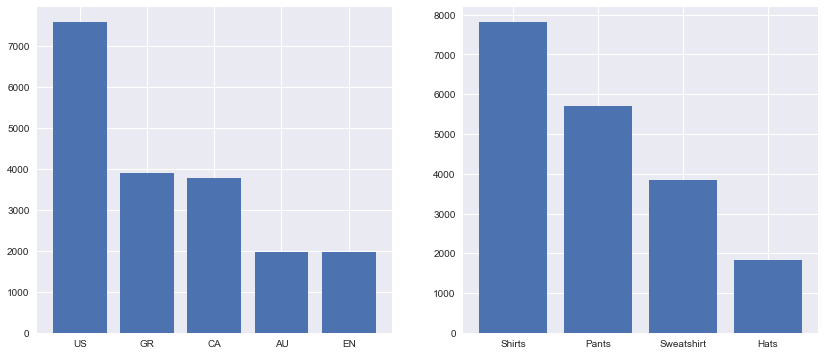

In [69]:
## Get the Country values and store in a DataFrame
countryDF = df.query('Column == "Country"').sort_values('Frequency', ascending=False)
display(countryDF)

## Get the Product values and store in a DataFrame
productDF = df.query('Column == "Product"').sort_values('Frequency', ascending=False)
display(productDF)

## Plot each DataFrame
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,6))
ax1.bar(countryDF.CharVar, countryDF.Frequency)
ax2.bar(productDF.CharVar, productDF.Frequency);

## 10. Grouping and Aggregating

a. View the CASTable object and preview the CAS table.

In [70]:
orders

CASTable('orders', caslib='casuser')

In [71]:
orders.head()

,Product,Country,OrderDate,DiscountCode,Return,StoreID,Quantity,Price,Cost
0,Pants,EN,2020-06-27,FREEDEAL,,19.0,330.0,7.64,1.49
1,Shirts,US,2020-09-19,,,31.0,440.0,6.39,1.99
2,Shirts,CA,2019-12-01,,,20.0,265.0,7.19,1.99
3,Sweatshirt,EN,2021-10-10,,,12.0,210.0,9.89,1.99
4,Pants,CA,2021-11-17,TC10,,27.0,260.0,8.09,1.49


b. Use the familiar Pandas groupby method. Store the object in a variable and view the variable.

In [72]:
countryGrp = orders.groupby('Country')
countryGrp

c. Specify the Quantity column from the CASTableGroupBy object. Then specify the mean aggregator. The data was summarized in CAS and returned as a Series to the client.

In [73]:
countryGrp.Quantity.mean()

Country
AU    261.033435
CA    262.016684
EN    255.142204
GR    258.275109
US    260.686610
Name: Quantity, dtype: float64

d. You can use the CASTableGroupBy object with actions. It returns a CASResults object with a key for each distinct value.

In [74]:
countryGrp.summary(inputs = 'Quantity',
                   subSet = ['MIN', 'MEAN', 'MAX'])

,Column,Min,Max,Mean
Country,,,,
AU,Quantity,20.0,500.0,261.033435
,Column,Min,Max,Mean
Country,,,,
CA,Quantity,20.0,500.0,262.016684
,Column,Min,Max,Mean
Country,,,,
EN,Quantity,20.0,500.0,255.142204
,Column,Min,Max,Mean
Country,,,,


e. Use the groupBy parameter to return similar results.

In [75]:
orders

CASTable('orders', caslib='casuser')

In [76]:
orders.groupby = 'Country'
orders

CASTable('orders', caslib='casuser', groupby='Country')

In [77]:
orders.Quantity.mean()

Country
AU    261.033435
CA    262.016684
EN    255.142204
GR    258.275109
US    260.686610
Name: Quantity, dtype: float64

f. Use the CASTable object with actions for similar results.

In [78]:
cr = orders.summary(inputs = 'Quantity',
                    subSet = ['MIN', 'MEAN', 'MAX'])

cr

,Column,Min,Max,Mean
Country,,,,
AU,Quantity,20.0,500.0,261.033435
,Column,Min,Max,Mean
Country,,,,
CA,Quantity,20.0,500.0,262.016684
,Column,Min,Max,Mean
Country,,,,
EN,Quantity,20.0,500.0,255.142204
,Column,Min,Max,Mean
Country,,,,


g. View the keys of the CASResults object.

In [79]:
cr.keys()

odict_keys(['ByGroup1.Summary', 'ByGroup2.Summary', 'ByGroup3.Summary', 'ByGroup4.Summary', 'ByGroup5.Summary', 'ByGroupInfo'])

h. You can easily concatenate each groupBy object with the concat_bygroups method on a CASResults object. It will combine all by groups into a single DataFrame.

In [80]:
summary_cr = cr.concat_bygroups()
summary_cr

,Column,Min,Max,Mean
Country,,,,
AU,Quantity,20.0,500.0,261.033435
CA,Quantity,20.0,500.0,262.016684
EN,Quantity,20.0,500.0,255.142204
GR,Quantity,20.0,500.0,258.275109
US,Quantity,20.0,500.0,260.686610


## 11. Doing More with Python in SAS Viya (Bonus Material)



### Promote a Table

a. To share a CAS table with other users, or use a CAS table in other SAS Viya Applications like SAS Visual Analytics the table must be promoted to global scope. 

[Summary of Table Scope](https://go.documentation.sas.com/doc/en/pgmsascdc/v_020/casfun/n09ssmi0ko8uyfn1022ezo2hv0pm.htm#n0dttoklpr4s22n1qy24yosbgqhp)

**NOTE:** To share a CAS table with other users, the table must be placed in a caslib that other users have access too. The casuser caslib is only accessible to a single user.

In [81]:
## View available CAS tables. Notice the global column for the orders table is 0.
conn.tableInfo(caslib = 'casuser')

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,ORDERS,19200,9,0,utf-8,2023-01-18T00:38:37+00:00,2023-01-18T00:40:51+00:00,2023-01-18T00:41:38+00:00,UTF8,1.989622e+09,1.989622e+09,1.989622e+09,0,0,0,0,ordersDemo.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-18T00:35:57+00:00,1.989621e+09


b. Open SAS Visual Analytics. The orders table is not available outside this CAS session.

c. Promote the orders table and view available CAS table. Notice global is now 1.

In [82]:
## Promote the orders table to global scope in the casuser caslib
p = conn.promote(name = 'orders', caslib = 'casuser')
display(p)

## View available CAS tables. Notice the global column for the orders table is 1.
ti = conn.tableInfo(caslib = 'casuser')
display(ti)

NOTE: Cloud Analytic Services promoted table ORDERS in caslib CASUSER(Peter.Styliadis@sas.com) to table orders in caslib CASUSER(Peter.Styliadis@sas.com).


+ Elapsed: 0.0271s, user: 0.0133s, sys: 0.0292s, mem: 1.42mb

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,ORDERS,19200,9,0,utf-8,2023-01-18T00:38:37+00:00,2023-01-18T00:41:51+00:00,2023-01-18T00:41:51+00:00,UTF8,1.989622e+09,1.989622e+09,1.989622e+09,1,0,0,0,ordersDemo.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-18T00:35:57+00:00,1.989621e+09


d. Open SAS Visual Analytics. The orders table is now available outside this CAS session.

### Execute SQL
a. Load the fedSQL action set.

In [83]:
conn.loadActionSet('fedSQL')
conn.fedSQL?

NOTE: Added action set 'fedSQL'.


Signature:   conn.fedSQL(*args, **kwargs)
Type:        Fedsql
String form: <swat.cas.actions.Fedsql object at 0x0000021ACE82B0D0>
File:        c:\users\pestyl\anaconda3\lib\site-packages\swat\cas\actions.py
Docstring:  
FedSQL

Actions
-------
fedsql.execdirect : Submits a SAS FedSQL language statement for immediate
                    execution


b. Execute SQL on a CAS table.

In [84]:
q = '''
    select Country, Quantity, Price
        from casuser.orders
        limit 10
'''

conn.execDirect(query = q)

,Country,Quantity,Price
0,EN,330.0,7.64
1,US,440.0,6.39
2,CA,265.0,7.19
3,EN,210.0,9.89
4,CA,260.0,8.09
5,US,155.0,8.54
6,US,145.0,7.59
7,US,230.0,7.19
8,US,495.0,8.79
9,AU,100.0,8.99


### SAS DATA Step
a. View the dataStep action set.

In [85]:
conn.dataStep?

Signature:   conn.dataStep(*args, **kwargs)
Type:        Datastep
String form: <swat.cas.actions.Datastep object at 0x0000021ACCCD2820>
File:        c:\users\pestyl\anaconda3\lib\site-packages\swat\cas\actions.py
Docstring:  
DATA Step

Actions
-------
datastep.runcode      : Runs DATA step code
datastep.runcodetable : Runs DATA step code stored in a CAS table


b. Use DATA Step code.

In [86]:
ds_code = '''
data casuser.us
     casuser.gr
     casuser.other;
    set casuser.orders;
    if Country = 'US' then output casuser.us;
      else if Country = 'GR' then output casuser.gr;
      else output casuser.other;
    run;
'''

conn.runCode(code = ds_code)

[InputCasTables]

                              casLib    Name   Rows  Columns                                           casTable
 0  CASUSER(Peter.Styliadis@sas.com)  orders  19200        9  CASTable('orders', caslib='CASUSER(Peter.Styli...

[OutputCasTables]

                              casLib   Name  Rows  Columns  Append Promoted                                           casTable
 0  CASUSER(Peter.Styliadis@sas.com)     us  7588        9     NaN        N  CASTable('us', caslib='CASUSER(Peter.Styliadis...
 1  CASUSER(Peter.Styliadis@sas.com)     gr  3893        9     NaN        N  CASTable('gr', caslib='CASUSER(Peter.Styliadis...
 2  CASUSER(Peter.Styliadis@sas.com)  other  7719        9     NaN        N  CASTable('other', caslib='CASUSER(Peter.Stylia...

+ Elapsed: 0.17s, user: 0.277s, sys: 0.628s, mem: 136mb

c. View available in-memory tables. Notice multiple CAS tables were created with a single read of the CAS table.

In [87]:
conn.tableInfo(caslib = 'casuser')

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,US,7588,9,0,utf-8,2023-01-18T00:42:02+00:00,2023-01-18T00:42:02+00:00,2023-01-18T00:42:02+00:00,UTF8,1.989622e+09,1.989622e+09,1.989622e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN
1,GR,3893,9,0,utf-8,2023-01-18T00:42:02+00:00,2023-01-18T00:42:02+00:00,2023-01-18T00:42:02+00:00,UTF8,1.989622e+09,1.989622e+09,1.989622e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN
2,OTHER,7719,9,0,utf-8,2023-01-18T00:42:02+00:00,2023-01-18T00:42:02+00:00,2023-01-18T00:42:02+00:00,UTF8,1.989622e+09,1.989622e+09,1.989622e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN
3,ORDERS,19200,9,0,utf-8,2023-01-18T00:38:37+00:00,2023-01-18T00:41:51+00:00,2023-01-18T00:42:02+00:00,UTF8,1.989622e+09,1.989622e+09,1.989622e+09,1,0,0,0,ordersDemo.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-18T00:35:57+00:00,1.989621e+09


## 12. Drop the global Orders CAS Table

a. You can drop a table using the dropTable action.

In [88]:
conn.dropTable(name = 'orders', caslib = 'casuser')

NOTE: Cloud Analytic Services dropped table orders from caslib CASUSER(Peter.Styliadis@sas.com).


+ Elapsed: 0.0157s, user: 0.0151s, sys: 0.00872s, mem: 1.4mb

## 13. Terminate your CAS Session 

In [162]:
conn.terminate()

## 14. Reconnect to CAS

a. Reconnect to CAS and view available in-memory tables. Notice all session scope CAS tables have automatically been dropped since they were not promoted.

In [89]:
conn = connect_to_cas() 
conn.tableInfo(caslib = 'casuser')

NOTE: No tables are available in caslib CASUSER(Peter.Styliadis@sas.com) of Cloud Analytic Services.


+ Elapsed: 0.011s, user: 0.00984s, sys: 0.0138s, mem: 1.47mb

b. Terminate your CAS session.

In [90]:
conn.terminate()

# Thanks for attending!

### Feel free to connect with me on [LinkedIn](https://www.linkedin.com/in/peter-styliadis-712bb357/) - Peter Styliadis

Check out my SAS Viya blog series. Updates are posted on LinkedIn.
- [Getting Started with Python Integration to SAS® Viya® - Index](https://blogs.sas.com/content/sgf/2020/06/19/getting-started-with-python-integration-to-sas-viya-index/)
- [CAS Action! - a series on fundamentals](https://blogs.sas.com/content/sgf/2021/08/06/cas-action-a-series-on-fundamentals/)
